Regularisasi Neural Network
===================

Neural networks terdiri dari lapisan (layers) dan modul (modules) yang beroperasi pada data.
Semua keterangan mengenai bagian penyusunnya dapat dibaca di torch.nn https://pytorch.org/docs/stable/nn.html  
Sebuah neural network adalah sebuah modul yang terdiri dari modul-modul lainnya (layers). Struktur berlapis ini dipakai untuk memudahkan manajemen arsitektur kompleks

Di bagian ini, kita akan menciptakan neural network untuk klasifikasi gambar pada dataset FashionMNIST.




In [1]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
#import torchvision
#from torchvision import datasets, transforms

Memilih Perangkat untuk Training
-----------------------
Kita akan melatih model pada perangkat akselerasi seperti GPU (jika tersedia)
`torch.cuda <https://pytorch.org/docs/stable/notes/cuda.html>`, 
Jika tidak tersedia kita akan melanjutkan dengan menggunakan CPU.



In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Gunakan perangkat {device}')

Gunakan perangkat cpu


Definisikan Kelas
-------------------------
Kita mendefinisikan neural network melalui ``nn.Module``, dan menginisiasi lapisan neural network di ``__init__``. Setiap ``nn.Module`` mengimplementasikan operasi pada input melalui metode ``forward``



In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 3),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        pred_probab = nn.Softmax(dim=1)(logits)
        return pred_probab

Ciptakan sebuah salinan (instance) dari ``NeuralNetwork``, dan pindahkan menuju ``device``, dan tampilkan strukturnya.



In [4]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=3, bias=True)
  )
)


Untuk menggunakan model, kita memasukan inputnya. Ini mengeksekusi ``forward``,
bersama `background operations <https://github.com/pytorch/pytorch/blob/270111b7b611d174967ed204776985cefca9c144/torch/nn/modules/module.py#L866>`_.
Jangan memanggil ``model.forward()`` secara langsung!

Memanggil model pada input menghasilkan tensor 10 dimensi dengan nilai prediksi untuk setiap kelas.
Kita mendapatkan peluang prediksi dengan memasukannya melalui salinan (instance) dari modul ``nn.Softmax``.



In [5]:
X = torch.rand(1, 28, 28, device=device)
#print(X)
pred_probab = model(X)
#print(pred_probab)
y_pred = pred_probab.argmax(1)
print(f"Prediksi: {y_pred}")

Prediksi: tensor([0])


--------------




Lapisan Model
-------------------------

Mari memecah lapisan-lapisan pada model. Untuk ilustrasi, kita coba ambil sampel minibatch dari 3 gambar dengan ukuran 28x28 dan lihat apa yang terjadi ketika kita memasukannya melalui network.


In [6]:
input_image = torch.rand(3,28,28)
print(input_image)
print(input_image.size())

tensor([[[0.1531, 0.2855, 0.7702,  ..., 0.6326, 0.8735, 0.7878],
         [0.4178, 0.6152, 0.1048,  ..., 0.4406, 0.6475, 0.2187],
         [0.9894, 0.0799, 0.2238,  ..., 0.9074, 0.5162, 0.3013],
         ...,
         [0.4256, 0.8297, 0.2248,  ..., 0.2739, 0.0452, 0.3350],
         [0.5895, 0.4812, 0.1721,  ..., 0.2757, 0.4930, 0.3120],
         [0.4926, 0.5791, 0.3246,  ..., 0.6514, 0.5531, 0.1134]],

        [[0.4648, 0.5120, 0.3907,  ..., 0.4417, 0.0665, 0.6956],
         [0.5481, 0.7326, 0.1929,  ..., 0.6140, 0.9157, 0.3622],
         [0.8025, 0.7279, 0.5637,  ..., 0.2640, 0.2509, 0.8669],
         ...,
         [0.9148, 0.4503, 0.0397,  ..., 0.9956, 0.2210, 0.9156],
         [0.0508, 0.7178, 0.9369,  ..., 0.1024, 0.5136, 0.9576],
         [0.2106, 0.0498, 0.0645,  ..., 0.3555, 0.9201, 0.3951]],

        [[0.7249, 0.1341, 0.3573,  ..., 0.0501, 0.6210, 0.1959],
         [0.0017, 0.1328, 0.6244,  ..., 0.9024, 0.4819, 0.8742],
         [0.7175, 0.5834, 0.5293,  ..., 0.1162, 0.2943, 0.

Perataan (Flatten)
---------------

Kita menginisasi lapisan perataan `nn.Flatten  <https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html>`_
untuk mengubah setiap gambar 2D 28x28 menjadi vektor 784 pixel.



In [7]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


Transformasi Linear
-----------

Lapisan linear `<https://pytorch.org/docs/stable/generated/torch.nn.Linear.html>`_
adalah modul yang mengerjakan transformasi linear pada input dengan menggunakan bobot yang sudah disimpan 




In [8]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


Fungsi Aktivasi
----------
Aktivasi non-linear akan membuat map kompleks dari input menuju output.
Non-linearitas akan membantu neural network belajar beragam variasi fenomena.

Pada contoh kali ini, kita hanya menggunakan `nn.ReLU <https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html>`_ 
diantara lapisan linear, tapi terdapat bentuk aktivasi non-linear lain.



In [9]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.0758, -0.2590,  0.3230, -0.2822,  0.1056, -0.0098, -0.7790, -0.0458,
         -0.0752, -0.1595,  0.1228, -0.2150, -0.2527,  0.4896,  0.3563, -0.2038,
         -0.2365,  0.2779,  0.1084,  0.0410],
        [-0.1294, -0.5230,  0.4146, -0.5938,  0.0151, -0.0617, -0.4141,  0.2802,
         -0.0272, -0.1577, -0.0461,  0.1529, -0.1631,  0.2581,  0.3298, -0.1231,
          0.1759,  0.2480,  0.2286, -0.2249],
        [-0.1871, -0.2348,  0.3487, -0.4944,  0.2905, -0.2176, -0.4970,  0.0572,
         -0.1828, -0.2577, -0.1039,  0.2189, -0.2027,  0.0802,  0.1982, -0.2044,
         -0.2308,  0.0867,  0.3383, -0.2244]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.0000, 0.3230, 0.0000, 0.1056, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.1228, 0.0000, 0.0000, 0.4896, 0.3563, 0.0000, 0.0000, 0.2779,
         0.1084, 0.0410],
        [0.0000, 0.0000, 0.4146, 0.0000, 0.0151, 0.0000, 0.0000, 0.2802, 0.0000,
         0.0000, 0.0000, 0.1529, 0.0000, 0.2581, 0.32

Bentuk Berderet
-------------

`nn.Sequential <https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html>`_ adalah sebuah modul dengan susunan deretan modul. Data diolah melalui semua modul sesuai urutan yang diberikan. 



In [10]:
layer2 = nn.Linear(20, 10)
actf = nn.ReLU()

seq_modules = nn.Sequential(
    flatten,
    layer1,
    actf,
    layer2
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)
logits

tensor([[-3.5595e-02, -1.1910e-01,  1.1457e-01, -5.3885e-03,  1.6439e-01,
         -2.0026e-01, -2.2332e-01,  1.9934e-01,  1.0787e-01,  2.2607e-04],
        [-4.6966e-03, -2.9650e-01,  9.3158e-02, -8.3247e-02,  1.1868e-01,
         -6.0382e-02, -2.7528e-01,  2.0196e-01, -2.8890e-02, -7.3079e-02],
        [ 9.0127e-04, -1.3898e-01,  1.4069e-01, -8.5162e-02,  1.5920e-01,
         -5.5518e-02, -3.0799e-01,  1.2194e-01, -8.4877e-02,  7.1132e-02]],
       grad_fn=<AddmmBackward0>)

Bentuk Tensor (Alternatif)
-------------

Neural network dapat pula disusun sesuai deretan operasi tensor dari input menuju output



#### Soal
Lanjutkan operasi tensor berikut untuk menghasilkan logits yang sama dengan bentuk sequential

In [11]:
x = flatten(input_image)
x = layer1(x)
x = actf(x)
logits = layer2(x)
logits

tensor([[-3.5595e-02, -1.1910e-01,  1.1457e-01, -5.3885e-03,  1.6439e-01,
         -2.0026e-01, -2.2332e-01,  1.9934e-01,  1.0787e-01,  2.2607e-04],
        [-4.6966e-03, -2.9650e-01,  9.3158e-02, -8.3247e-02,  1.1868e-01,
         -6.0382e-02, -2.7528e-01,  2.0196e-01, -2.8890e-02, -7.3079e-02],
        [ 9.0127e-04, -1.3898e-01,  1.4069e-01, -8.5162e-02,  1.5920e-01,
         -5.5518e-02, -3.0799e-01,  1.2194e-01, -8.4877e-02,  7.1132e-02]],
       grad_fn=<AddmmBackward0>)

Softmax
---------------

Lapisan paling akhir pada model kita mengeluarkan `logits` - nilai diantara [-\infty, \infty] - sebagai input dari modul
`nn.Softmax <https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html>`_. Hasilnya adalah nilai diantara
[0, 1] sebagai representasi peluang prediksi untuk setiap kelas. parameter ``dim`` mengindikasikan pilihan dimensi mana yang jumlahnya harus 1.



In [12]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
pred_probab

tensor([[0.0955, 0.0879, 0.1110, 0.0985, 0.1167, 0.0810, 0.0792, 0.1208, 0.1103,
         0.0990],
        [0.1025, 0.0766, 0.1131, 0.0948, 0.1160, 0.0970, 0.0782, 0.1261, 0.1001,
         0.0957],
        [0.1009, 0.0878, 0.1161, 0.0926, 0.1182, 0.0954, 0.0741, 0.1139, 0.0926,
         0.1083]], grad_fn=<SoftmaxBackward0>)

In [13]:
pred_probab.sum(axis=1)

tensor([1.0000, 1.0000, 1.0000], grad_fn=<SumBackward1>)

Dropout
--------

Regularisasi dropout dapat diimplementasi dengan menambah lapisan dropout pada bobot yang memerlukannya

In [14]:
m = nn.Dropout(p=0.2)
output = m(input_image)
output[0]

tensor([[1.1813, 0.4659, 1.1706, 0.0000, 0.0000, 0.9312, 0.0000, 1.2363, 0.6092,
         0.1538, 0.4643, 0.0000, 0.6819, 0.5881, 0.0000, 1.1804, 1.2009, 0.6485,
         0.5556, 0.0000, 1.1512, 0.0000, 0.5860, 0.6422, 0.9634, 0.7559, 1.0057,
         0.4383],
        [0.0353, 0.8233, 0.8055, 1.0761, 1.1649, 0.8773, 0.0000, 0.7396, 1.0806,
         0.4407, 0.1582, 0.6334, 1.2305, 0.0000, 0.0000, 0.0000, 0.0577, 0.9562,
         0.0051, 0.8362, 0.0285, 0.5387, 0.9557, 0.9681, 1.0477, 1.0432, 1.2280,
         0.0609],
        [1.0821, 0.7896, 0.0020, 0.3975, 0.0442, 0.0000, 0.0000, 0.3998, 0.3701,
         0.0000, 0.4626, 1.0894, 0.0000, 0.0000, 0.8305, 0.4782, 1.0132, 1.2162,
         0.4754, 1.0482, 1.1440, 0.6609, 0.0000, 0.3660, 0.0000, 1.0556, 0.0000,
         0.3384],
        [0.7823, 0.5150, 0.2779, 0.3843, 0.0176, 1.0029, 0.0000, 0.8070, 1.0785,
         0.0280, 1.0810, 1.1414, 0.0000, 0.7697, 0.0000, 0.3276, 0.5485, 0.0000,
         0.8931, 0.0000, 0.2329, 0.3929, 1.0785, 1.0619

In [15]:
m = nn.Dropout(p=0.5)
output = m(x)
output[0]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.3372, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.5391, 0.0000, 0.6452, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000], grad_fn=<SelectBackward0>)

Normalisasi Batch
---------

Normalisasi batch

In [16]:
m = nn.BatchNorm1d(x.shape[1])
output = m(x)
output[0]

tensor([-0.6920,  0.4127, -0.2502,  0.0000, -0.3069, -0.7047,  0.0000,  0.0000,
        -1.4020,  0.0000, -0.7028,  0.8213, -0.7019,  0.4709, -1.3766,  0.0000,
         0.0000,  1.1192,  0.7274,  0.0000], grad_fn=<SelectBackward0>)

In [17]:
m = nn.BatchNorm1d(logits.shape[1])
output = m(logits)
output[0]

tensor([-1.3734,  0.8280, -0.0797,  1.4088,  0.8204, -1.4120,  1.3010,  0.6691,
         1.3556,  0.0136], grad_fn=<SelectBackward0>)

Parameter Model
-------------------------
Banyak lapisan dalam neural network adalah parameter, yaitu memiliki bobot yang akan dioptimalisasi selama training
``nn.Module`` otomatis melacak semua isi dalam objek model, dan membuat semua parameter terakses menggunakan metode ``parameters()`` atau ``named_parameters()``.

Di contoh ini, kita iterasi setiap parameter, lalu mencetak ukurannya dan melihat nilainya.




In [18]:
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=3, bias=True)
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0102, -0.0124, -0.0010,  ..., -0.0285,  0.0227,  0.0137],
        [-0.0234, -0.0247, -0.0170,  ...,  0.0175, -0.0304, -0.0197]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0252, -0.0219], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0252,  0.0003, -0.0387,  ..., -0.0339,  0.0320,  0.0114],
        [ 0.0200,  0.0174,  0.0048,  ..., -0.0022,  0.0426, -0.0293]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias |

--------------




#### Soal

Buatlah kelas neural network baru yang sama persis dengan kelas sebelumnya namun menggunakan bentuk tensor

In [19]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(28*28, 512)
        self.layer2 = nn.Linear(512, 512)
        self.layer3 = nn.Linear(512, 3)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.flatten(x)
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.relu(x)
        logits = self.layer3(x)
        prob = nn.Softmax(dim=1)(logits)
        return prob
    
NNet = NeuralNetwork().to(device)
print(NNet)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=784, out_features=512, bias=True)
  (layer2): Linear(in_features=512, out_features=512, bias=True)
  (layer3): Linear(in_features=512, out_features=3, bias=True)
  (relu): ReLU()
)


#### Soal

Buatlah kelas neural network baru (dengan nama NeuralNetworkReg) yang sama persis dengan kelas sebelumnya namun ditambah dengan memakai regularisasi dropout di setiap hidden layers, dan inisiasi xavier/He untuk setiap lapisan bobot

In [20]:
class NeuralNetworkReg(nn.Module):
    def __init__(self):
        super(NeuralNetworkReg, self).__init__()
        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(28*28, 512)
        #torch.nn.init.xavier_normal_(self.layer1.weight)
        torch.nn.init.kaiming_uniform_(self.layer1.weight, mode='fan_in', nonlinearity='relu')
        self.layer2 = nn.Linear(512, 512)
        #torch.nn.init.xavier_normal_(self.layer2.weight)
        torch.nn.init.kaiming_uniform_(self.layer2.weight, mode='fan_in', nonlinearity='relu')
        self.layer3 = nn.Linear(512, 3)
        #torch.nn.init.xavier_normal_(self.layer3.weight)
        torch.nn.init.kaiming_uniform_(self.layer3.weight, mode='fan_in', nonlinearity='relu')
        self.relu = nn.ReLU()
        self.mask = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.flatten(x)
        x = self.layer1(x)
        x = self.mask(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.mask(x)
        x = self.relu(x)
        logits = self.layer3(x)
        prob = nn.Softmax(dim=1)(logits)
        return prob
    
NNetReg = NeuralNetworkReg().to(device)
print(NNetReg)

NeuralNetworkReg(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=784, out_features=512, bias=True)
  (layer2): Linear(in_features=512, out_features=512, bias=True)
  (layer3): Linear(in_features=512, out_features=3, bias=True)
  (relu): ReLU()
  (mask): Dropout(p=0.5, inplace=False)
)


Buatlah data input dan label

In [21]:
input_image = torch.rand(100,28,28)
label_image = torch.randint(0, 3, (100,))
print(input_image.size())
print(label_image.size())


torch.Size([100, 28, 28])
torch.Size([100])


Hitung prediksi model dan bandingkan dengan label

In [22]:
X = input_image.to(device)
y = label_image.to(device)
prob = NNet(X)
y_pred = prob.argmax(1)
print(f"Prediksi: {y_pred}")
print(f"Label: {y}")
print(f"akurasi: {torch.sum(y_pred == y)/len(y_pred)}")

Prediksi: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])
Label: tensor([0, 0, 0, 1, 2, 1, 1, 1, 2, 2, 2, 1, 0, 1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 2,
        1, 1, 0, 0, 0, 1, 1, 2, 0, 2, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 1,
        0, 2, 0, 1, 2, 0, 2, 1, 2, 1, 0, 0, 2, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 0,
        2, 1, 0, 0, 2, 0, 0, 1, 1, 2, 0, 1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 1, 0, 1,
        1, 1, 2, 0])
akurasi: 0.33000001311302185


Hitunglah loss function dengan menggunakan cross entropy

In [23]:
criterion = nn.CrossEntropyLoss()
loss = criterion(prob, y)
print(loss)

tensor(1.1005, grad_fn=<NllLossBackward0>)


Penalti Norm 
----------
Regularisasi penalti dapat diimplementasi secara manual dengan modifikasi loss function atau secara otomatis dengan menggunakan weight decay

In [24]:
l2_lambda = 0.001
l2_norm = sum(p.pow(2.0).sum() for p in NNet.parameters())
loss_reg = loss + l2_lambda * l2_norm

In [25]:
sgd = torch.optim.SGD(NNet.parameters(), lr=0.1, weight_decay=l2_lambda)


Gunakan Backpropagation dan gradient descent untuk mengubah bobot dengan memakai regularisasi l2

In [26]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(NNet.parameters(), lr=0.1, weight_decay=l2_lambda)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
prob = NNet(X)
loss = criterion(prob, y)
loss.backward()     #backprop
optimizer.step()    #update
print(loss)

tensor(1.1005, grad_fn=<NllLossBackward0>)


Cara gradient descent manual

In [27]:
learning_rate = 0.1
for p in NNet.parameters():
    p.data.sub_(p.grad.data * learning_rate)

Hitung kembali akurasi

In [28]:
prob = NNet(X)
y_pred = prob.argmax(1)
print(f"Prediksi: {y_pred}")
print(f"Label: {y}")
print(f"akurasi: {torch.sum(y_pred == y)/len(y_pred)}")

Prediksi: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])
Label: tensor([0, 0, 0, 1, 2, 1, 1, 1, 2, 2, 2, 1, 0, 1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 2,
        1, 1, 0, 0, 0, 1, 1, 2, 0, 2, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 1,
        0, 2, 0, 1, 2, 0, 2, 1, 2, 1, 0, 0, 2, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 0,
        2, 1, 0, 0, 2, 0, 0, 1, 1, 2, 0, 1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 1, 0, 1,
        1, 1, 2, 0])
akurasi: 0.33000001311302185


#### Soal
iterasi sampe 100 kali dan plot loss function terhadap iterasi, lalu hitung akurasi

tensor(1.0996, grad_fn=<NllLossBackward0>)
tensor(1.0991, grad_fn=<NllLossBackward0>)
tensor(1.0987, grad_fn=<NllLossBackward0>)
tensor(1.0983, grad_fn=<NllLossBackward0>)
tensor(1.0979, grad_fn=<NllLossBackward0>)
tensor(1.0975, grad_fn=<NllLossBackward0>)
tensor(1.0972, grad_fn=<NllLossBackward0>)
tensor(1.0968, grad_fn=<NllLossBackward0>)
tensor(1.0965, grad_fn=<NllLossBackward0>)
tensor(1.0961, grad_fn=<NllLossBackward0>)
tensor(1.0958, grad_fn=<NllLossBackward0>)
tensor(1.0954, grad_fn=<NllLossBackward0>)
tensor(1.0951, grad_fn=<NllLossBackward0>)
tensor(1.0948, grad_fn=<NllLossBackward0>)
tensor(1.0944, grad_fn=<NllLossBackward0>)
tensor(1.0941, grad_fn=<NllLossBackward0>)
tensor(1.0938, grad_fn=<NllLossBackward0>)
tensor(1.0935, grad_fn=<NllLossBackward0>)
tensor(1.0932, grad_fn=<NllLossBackward0>)
tensor(1.0929, grad_fn=<NllLossBackward0>)
tensor(1.0926, grad_fn=<NllLossBackward0>)
tensor(1.0922, grad_fn=<NllLossBackward0>)
tensor(1.0919, grad_fn=<NllLossBackward0>)
tensor(1.09

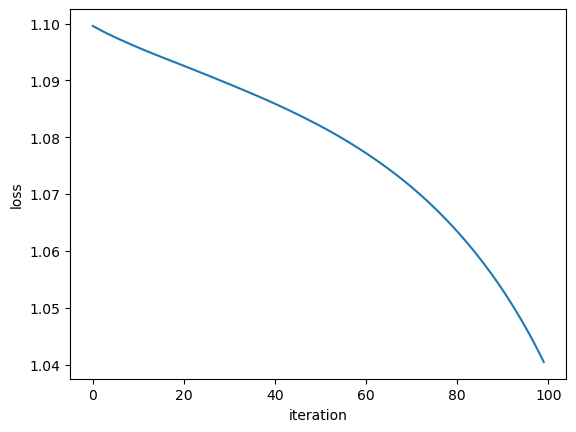

Prediksi: tensor([0, 0, 0, 1, 2, 1, 1, 1, 2, 2, 2, 1, 0, 1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 2,
        1, 1, 0, 0, 0, 1, 1, 2, 0, 2, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 1,
        0, 2, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 0,
        2, 1, 0, 0, 2, 0, 0, 1, 1, 2, 0, 1, 2, 1, 2, 0, 1, 1, 0, 2, 2, 1, 0, 1,
        1, 1, 2, 0])
Label: tensor([0, 0, 0, 1, 2, 1, 1, 1, 2, 2, 2, 1, 0, 1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 2,
        1, 1, 0, 0, 0, 1, 1, 2, 0, 2, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 1,
        0, 2, 0, 1, 2, 0, 2, 1, 2, 1, 0, 0, 2, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 0,
        2, 1, 0, 0, 2, 0, 0, 1, 1, 2, 0, 1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 1, 0, 1,
        1, 1, 2, 0])
akurasi: 0.9800000190734863


In [29]:
import matplotlib.pyplot as plt
prob = NNet(X)
optimizer = optim.SGD(NNet.parameters(), lr=0.1, weight_decay=0)
Loss = []
for i in range(100):
    optimizer.zero_grad()   # zero the gradient buffers
    prob = NNet(X)       # feedforward
    loss = criterion(prob, y)
    loss.backward()     #backprop
    optimizer.step()    #update
    print(loss)
    Loss.append(float(loss.detach().numpy()))
    
plt.plot(Loss)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.show()
plt.close()

prob = NNet(X)
y_pred = prob.argmax(1)
print(f"Prediksi: {y_pred}")
print(f"Label: {y}")
print(f"akurasi: {torch.sum(y_pred == y)/len(y_pred)}")

Lakukan hal yang sama untuk Neural Network dengan regularisasi dropout, L2, dan inisiasi

tensor(1.1407, grad_fn=<NllLossBackward0>)
tensor(1.1473, grad_fn=<NllLossBackward0>)
tensor(1.1549, grad_fn=<NllLossBackward0>)
tensor(1.1446, grad_fn=<NllLossBackward0>)
tensor(1.1480, grad_fn=<NllLossBackward0>)
tensor(1.1513, grad_fn=<NllLossBackward0>)
tensor(1.1155, grad_fn=<NllLossBackward0>)
tensor(1.0533, grad_fn=<NllLossBackward0>)
tensor(1.0846, grad_fn=<NllLossBackward0>)
tensor(1.0614, grad_fn=<NllLossBackward0>)
tensor(1.0567, grad_fn=<NllLossBackward0>)
tensor(1.0964, grad_fn=<NllLossBackward0>)
tensor(1.1256, grad_fn=<NllLossBackward0>)
tensor(1.0708, grad_fn=<NllLossBackward0>)
tensor(1.0446, grad_fn=<NllLossBackward0>)
tensor(1.0563, grad_fn=<NllLossBackward0>)
tensor(1.0699, grad_fn=<NllLossBackward0>)
tensor(1.0653, grad_fn=<NllLossBackward0>)
tensor(1.0284, grad_fn=<NllLossBackward0>)
tensor(1.0698, grad_fn=<NllLossBackward0>)
tensor(1.0631, grad_fn=<NllLossBackward0>)
tensor(1.0519, grad_fn=<NllLossBackward0>)
tensor(1.0347, grad_fn=<NllLossBackward0>)
tensor(1.05

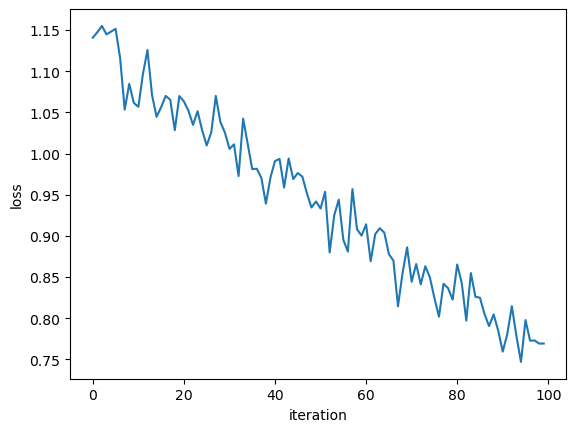

Prediksi: tensor([0, 0, 0, 1, 2, 2, 1, 1, 2, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2,
        1, 1, 0, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 1, 1, 0, 1,
        0, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2, 2,
        2, 0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 1, 2, 0, 2, 1, 0, 1, 0, 2, 2, 1, 0, 2,
        2, 2, 2, 0])
Label: tensor([0, 0, 0, 1, 2, 1, 1, 1, 2, 2, 2, 1, 0, 1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 2,
        1, 1, 0, 0, 0, 1, 1, 2, 0, 2, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 1,
        0, 2, 0, 1, 2, 0, 2, 1, 2, 1, 0, 0, 2, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 0,
        2, 1, 0, 0, 2, 0, 0, 1, 1, 2, 0, 1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 1, 0, 1,
        1, 1, 2, 0])
akurasi: 0.8100000023841858


In [30]:
l2_lambda=0.01
prob = NNetReg(X)
optimizer = optim.SGD(NNetReg.parameters(), lr=0.1, weight_decay=l2_lambda)
Loss = []
for i in range(100):
    optimizer.zero_grad()   # zero the gradient buffers
    prob = NNetReg(X)       # feedforward
    loss = criterion(prob, y)
    loss.backward()     #backprop
    optimizer.step()    #update
    print(loss)
    Loss.append(float(loss.detach().numpy()))
    
plt.plot(Loss)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.show()
plt.close()

prob = NNetReg(X)
y_pred = prob.argmax(1)
print(f"Prediksi: {y_pred}")
print(f"Label: {y}")
print(f"akurasi: {torch.sum(y_pred == y)/len(y_pred)}")